# Project 3 - Adult Income 

In [1]:
# Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
import torch
from torch import nn
from sklearn.metrics import log_loss

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
train_data = pd.read_csv('cleaned_train_income.csv')
test_data = pd.read_csv('cleaned_test_income.csv')
validation_data = pd.read_csv('cleaned_validation_income.csv')

train_data.replace('?', np.nan, inplace=True)
train_data = train_data.dropna()
test_data.replace('?', np.nan, inplace=True)
test_data = train_data.dropna()
validation_data.replace('?', np.nan, inplace=True)
validation_data = train_data.dropna()
accuracies = {}
precisions = {}

I will use the same columns with various classifiers to see which one is the most accurate at predicting income. I will use the features 'Age', 'Education Years','Hours Per Week', 'Race', and 'Sex'.

In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['Race'] = le.fit_transform(train_data['Race'])
test_data['Race'] = le.fit_transform(train_data['Race'])
validation_data['Race'] = le.fit_transform(train_data['Race'])
train_data['Sex'] = le.fit_transform(train_data['Sex'])
test_data['Sex'] = le.fit_transform(train_data['Sex'])
validation_data['Sex'] = le.fit_transform(train_data['Sex'])

# Logistic Regression

In [3]:
train_data

,Age,Work Class,Weight,Education Type,Education Years,Marital Status,Occupation,Familial Relationship,Race,Sex,Hours Per Week,Native Country,Income
0,53,State-gov,53197,Doctorate,16,Married-civ-spouse,Adm-clerical,Husband,4,1,50,United-States,1
1,41,State-gov,47170,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,48,United-States,1
2,28,Federal-gov,56651,Bachelors,13,Never-married,Prof-specialty,Own-child,2,0,40,United-States,0
3,29,Private,228075,HS-grad,9,Never-married,Adm-clerical,Unmarried,4,1,35,Mexico,0
4,51,Private,237729,Some-college,10,Divorced,Adm-clerical,Unmarried,4,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,59,Private,227386,10th,6,Married-civ-spouse,Craft-repair,Husband,4,1,40,United-States,0
26044,42,Private,39060,HS-grad,9,Married-civ-spouse,Sales,Husband,4,1,60,United-States,1
26045,22,Private,271274,11th,7,Never-married,Sales,Not-in-family,4,0,40,United-States,0
26046,19,Private,119964,HS-grad,9,Never-married,Craft-repair,Other-relative,4,0,15,United-States,0


With logistic regression, my goal is to fit a logistic curve to the scatterplot below to see if I can accurately predict whether a person made above 50K in a year or not. First I will practice with a small example so that I can visualize it. Then I will proceed to find the accuracy with all 

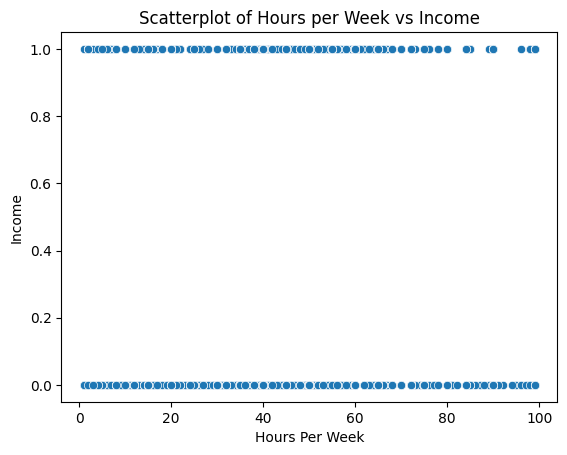

In [4]:
sns.scatterplot(data=train_data, x='Hours Per Week', y=(train_data['Income']))
plt.title('Scatterplot of Hours per Week vs Income')
plt.show()

This is just a visualization to help see how many people we have for each income class.

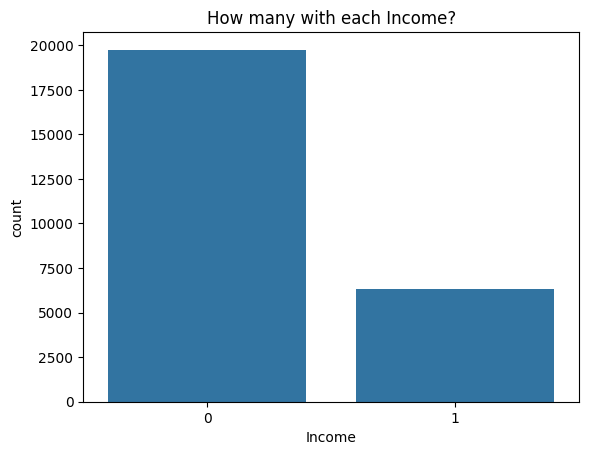

In [5]:
sns.countplot(data=train_data, x='Income')
plt.title('How many with each Income?')
plt.show()

Since we already have the data for training, testing, and validation, instead of using sklearn's train/test split, I will just make them here based on the CSVs. 

In [6]:
X_train = train_data[['Hours Per Week']]
X_test = test_data[['Hours Per Week']]
X_validation = validation_data[['Hours Per Week']]
y_train = train_data['Income']
y_test = test_data['Income']
y_validation = validation_data['Income']

In [7]:
# Defining Model
logistic_model = LogisticRegression()

In [8]:
# Fitting Model
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [9]:
y_pred = logistic_model.predict(X_test)

In [10]:
logistic_model.score(X_test, y_test)

0.7506910319410319

In [11]:
print(confusion_matrix(y_test,y_pred))

[[19330   419]
 [ 6075   224]]


In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86     19749
           1       0.35      0.04      0.06      6299

    accuracy                           0.75     26048
   macro avg       0.55      0.51      0.46     26048
weighted avg       0.66      0.75      0.66     26048



In [13]:
y_prob = logistic_model.predict_proba(X_test)
y_prob

array([[0.6838077 , 0.3161923 ],
       [0.7037035 , 0.2962965 ],
       [0.7755079 , 0.2244921 ],
       ...,
       [0.7755079 , 0.2244921 ],
       [0.91762875, 0.08237125],
       [0.7755079 , 0.2244921 ]])

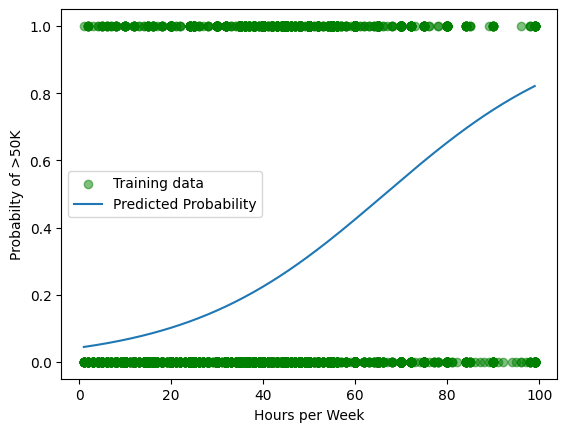

In [14]:
hours_range = np.linspace(X_train['Hours Per Week'].min(), X_train['Hours Per Week'].max(), 300).reshape(-1, 1)
y_prob = logistic_model.predict_proba(hours_range)[:, 1] 
plt.scatter(X_train, y_train, color='green', alpha=0.5, label='Training data')
plt.plot(hours_range, y_prob, label = 'Predicted Probability')
plt.xlabel('Hours per Week')
plt.ylabel('Probabilty of >50K')
plt.legend()
plt.show()



Now let's proceed to do this with all 5 of the predictors instead of just one. 

In [15]:
X_train = train_data[['Age', 'Education Years','Hours Per Week', 'Race', 'Sex']]
X_test = test_data[['Age', 'Education Years','Hours Per Week', 'Race', 'Sex']]
X_validation = validation_data[['Age', 'Education Years','Hours Per Week', 'Race', 'Sex']]
y_train = train_data['Income']
y_test = test_data['Income']
y_validation = validation_data['Income']


In [16]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_pred_lr = logistic_model.predict(X_test)

In [18]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88     19749
           1       0.66      0.39      0.49      6299

    accuracy                           0.80     26048
   macro avg       0.74      0.66      0.68     26048
weighted avg       0.79      0.80      0.78     26048



In [19]:
accuracies['Logistic Regression'] = 0.80
precisions['Logistic Regression'] = 0.79

As we can see the accuracy with all 5 predictors is about 80%, which is indeed better than our original 75%. 

# Support Vector Machines

The goal with SVMs is to try and draw a boundary between these points that best seperates the two income classes. I will also implement a kernel trick to better classify. Just like with logistic regression, I will first use a smaller example to visualize. 

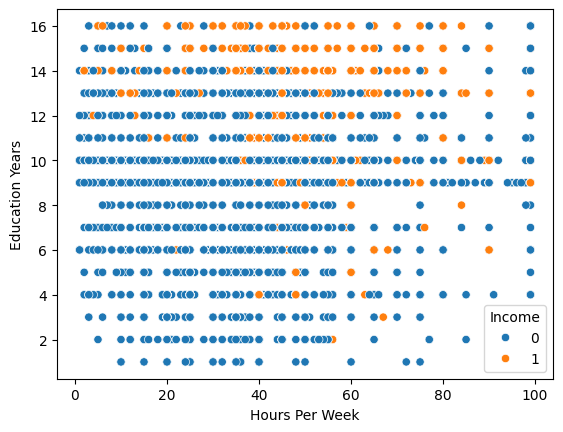

In [20]:
sns.scatterplot(data=train_data, x='Hours Per Week', y='Education Years', hue='Income')
plt.show()

In [21]:
# Crafting train, test, and validation sets
X_train_svm = train_data[['Hours Per Week', 'Education Years']]
X_test_svm = test_data[['Hours Per Week', 'Education Years']]
X_validation_svm = validation_data[['Hours Per Week', 'Education Years']]
y_train_svm = train_data['Income']
y_test_svm = test_data['Income']
y_validation_svm = validation_data['Income']

In [22]:
# Model Definition
svm_model = SVC()

In [23]:
# Fit Model
svm_model.fit(X_train_svm, y_train_svm)

SVC()

In [24]:
svm_model.score(X_test_svm, y_test_svm)

0.7761824324324325

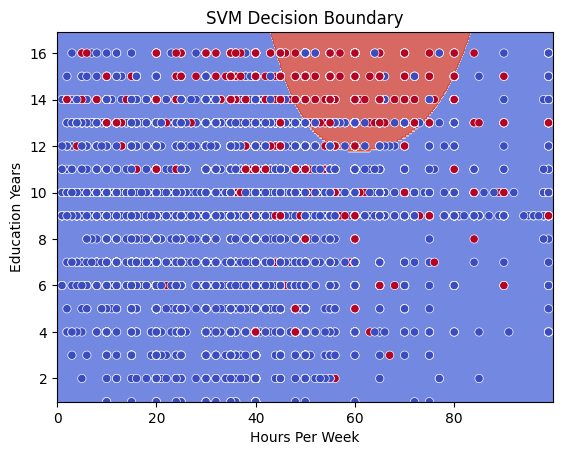

In [25]:
x_min, x_max = min(X_train_svm['Hours Per Week']) - 1, max(X_train_svm['Hours Per Week']) + 1
y_min, y_max = min(X_train_svm['Education Years']), max(X_train_svm['Education Years']) + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
sns.scatterplot(data=X_train_svm, x='Hours Per Week', y='Education Years', c=y_train_svm, cmap=plt.cm.coolwarm)
plt.xlabel('Hours Per Week')
plt.ylabel('Education Years')
plt.title('SVM Decision Boundary')
plt.show()


We can see that our model is 75% accurate without tweaking the parameters, but that is mostly because we already have way more "0" values than "1" values for income. Let's incorporate some kernels next. I figured out how to do that with sklearn via this Youtube Video: https://www.youtube.com/watch?v=kPkwf1x7zpU

The point of kernels is to act as a function that maps data to a higher dimension. This makes it easier to create a boundary between two classes, because there is more "space" to work with. There are many such kernel functions. Here are the ones I will test:

Linear - K(x,y)=x^Ty. Or essentially, the dot product of input samples. 

Radial Basis Function - K(x,y)=exp(−γ∥x−y∥^2), with gamma being a parameter that controls the spread of the points (I'm using default)

Polynomial - K(x,y)=(xTy+c)d, or essentially the dot product raised to a power. 

In [26]:
# Dict to keep track of scores
svm_kernel_scores = {}

In [27]:
# Fit Model with Linear Kernel Function
svm_model_lin = SVC(kernel='linear')
svm_model_lin.fit(X_train_svm, y_train_svm)
svm_model_lin.score(X_test_svm, y_test_svm)
svm_kernel_scores['Linear'] = svm_model_lin.score(X_test_svm, y_test_svm)

In [28]:
# Fit Model with RBF Kernel Function
svm_model_rbf = SVC(kernel='rbf')
svm_model_rbf.fit(X_train_svm, y_train_svm)
svm_model_rbf.score(X_test_svm, y_test_svm)
svm_kernel_scores['RBF'] = svm_model_rbf.score(X_test_svm, y_test_svm)

In [29]:
# Fit Model with Polynomial Kernel Function
svm_model_poly = SVC(kernel='poly')
svm_model_poly.fit(X_train_svm, y_train_svm)
svm_model_poly.score(X_test_svm, y_test_svm)
svm_kernel_scores['Polynomial'] = svm_model_poly.score(X_test_svm, y_test_svm)

In [30]:
svm_kernel_scores

{'Linear': 0.7581772113022113,
 'RBF': 0.7761824324324325,
 'Polynomial': 0.7708845208845209}

As we see, the RBF kernel function had the best results, but none of them were spectacular in this instance. Now let's run the model again with the five predictors. 

In [31]:
svm_model_rbf = SVC(kernel='rbf')
svm_model_rbf.fit(X_train, y_train)
svm_model_rbf.score(X_test, y_test)

0.8028255528255528

In [32]:
y_pred_svm = svm_model_rbf.predict(X_test)

In [33]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88     19749
           1       0.70      0.33      0.44      6299

    accuracy                           0.80     26048
   macro avg       0.76      0.64      0.66     26048
weighted avg       0.79      0.80      0.77     26048



In [34]:
accuracies['SVM']= 0.80
precisions['SVM'] = 0.79

# Decision Trees

In [35]:
train_data

,Age,Work Class,Weight,Education Type,Education Years,Marital Status,Occupation,Familial Relationship,Race,Sex,Hours Per Week,Native Country,Income
0,53,State-gov,53197,Doctorate,16,Married-civ-spouse,Adm-clerical,Husband,4,1,50,United-States,1
1,41,State-gov,47170,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,48,United-States,1
2,28,Federal-gov,56651,Bachelors,13,Never-married,Prof-specialty,Own-child,2,0,40,United-States,0
3,29,Private,228075,HS-grad,9,Never-married,Adm-clerical,Unmarried,4,1,35,Mexico,0
4,51,Private,237729,Some-college,10,Divorced,Adm-clerical,Unmarried,4,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,59,Private,227386,10th,6,Married-civ-spouse,Craft-repair,Husband,4,1,40,United-States,0
26044,42,Private,39060,HS-grad,9,Married-civ-spouse,Sales,Husband,4,1,60,United-States,1
26045,22,Private,271274,11th,7,Never-married,Sales,Not-in-family,4,0,40,United-States,0
26046,19,Private,119964,HS-grad,9,Never-married,Craft-repair,Other-relative,4,0,15,United-States,0


In [36]:
'''
train_data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['Race'] = le.fit_transform(train_data['Race'])

test_data['Race'] = le.fit_transform(train_data['Race'])
train_data['Sex'] = le.fit_transform(train_data['Sex'])
test_data['Sex'] = le.fit_transform(train_data['Sex'])'''

"\ntrain_data\nfrom sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\ntrain_data['Race'] = le.fit_transform(train_data['Race'])\n\ntest_data['Race'] = le.fit_transform(train_data['Race'])\ntrain_data['Sex'] = le.fit_transform(train_data['Sex'])\ntest_data['Sex'] = le.fit_transform(train_data['Sex'])"

In [37]:
'''train_data
#tree_X_train = train_data[['Age', 'Work Class', 'Education Years', 'Marital Status', 'Occupation', 'Familial Relationship', 'Race', 'Sex', 'Hours Per Week', 'Native Country']]
tree_X_train = train_data[['Age', 'Education Years','Hours Per Week', 'Race', 'Sex']]
tree_X_test = test_data[['Age', 'Education Years','Hours Per Week', 'Race', 'Sex']]
#tree_X_test = test_data[['Age', 'Work Class', 'Education Years', 'Marital Status', 'Occupation', 'Familial Relationship', 'Race', 'Sex', 'Hours Per Week', 'Native Country']]
tree_y_train = train_data['Income']
tree_y_test = test_data['Income']'''

"train_data\n#tree_X_train = train_data[['Age', 'Work Class', 'Education Years', 'Marital Status', 'Occupation', 'Familial Relationship', 'Race', 'Sex', 'Hours Per Week', 'Native Country']]\ntree_X_train = train_data[['Age', 'Education Years','Hours Per Week', 'Race', 'Sex']]\ntree_X_test = test_data[['Age', 'Education Years','Hours Per Week', 'Race', 'Sex']]\n#tree_X_test = test_data[['Age', 'Work Class', 'Education Years', 'Marital Status', 'Occupation', 'Familial Relationship', 'Race', 'Sex', 'Hours Per Week', 'Native Country']]\ntree_y_train = train_data['Income']\ntree_y_test = test_data['Income']"

In [38]:
dtc = DecisionTreeClassifier()

In [39]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
y_pred_dt = dtc.predict(X_test)

In [41]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     19749
           1       0.83      0.61      0.70      6299

    accuracy                           0.88     26048
   macro avg       0.86      0.79      0.81     26048
weighted avg       0.87      0.88      0.87     26048



In [42]:
accuracies['Decision Trees'] = 0.88
precisions['Decision Trees'] = 0.87

# Random Forest

Random forests are basically collection decision trees built on randomly bootstrapped training samples, and of which the predictors are selected from a random subset. 

In [43]:
rf = RandomForestClassifier()

In [44]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
y_pred_rf = rf.predict(X_test)

In [46]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     19749
           1       0.80      0.65      0.72      6299

    accuracy                           0.88     26048
   macro avg       0.85      0.80      0.82     26048
weighted avg       0.87      0.88      0.87     26048



As we see, the accuracy is about the same for the default random forest classifier as it is for the decision tree. But we also see that the other parameters are slightly different. For example, we see that the macro avg and precision are slightly higher. Let's keep messing with this to see if we can increase accuracy

In [47]:
features = pd.DataFrame(rf.feature_importances_, index=X_train.columns)

In [48]:
features

,0
Age,0.413757
Education Years,0.248932
Hours Per Week,0.236083
Race,0.033820
Sex,0.067408


In [49]:
'''rf2 = RandomForestClassifier(
    criterion='entropy',
    min_samples_split=5,
    max_depth=15
   
)
rf2 = RandomForestClassifier(
    criterion='entropy',
    min_samples_split=5,
    max_depth=15
   
)'''
rf2 = RandomForestClassifier(
    criterion='entropy',
    min_samples_split=3,
    max_depth=20
   
)

In [50]:
rf2.fit(X_train, y_validation)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=3)

In [51]:
y_pred_rf2 = rf2.predict(X_test)

In [52]:
print(classification_report(y_test, y_pred_rf2))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     19749
           1       0.79      0.63      0.70      6299

    accuracy                           0.87     26048
   macro avg       0.84      0.79      0.81     26048
weighted avg       0.87      0.87      0.87     26048



After messing around with the parameters, I annot really get the accuracy above 88%. This means the decision tree is comparable or even better than the random forest, which is somewhat strange. Although, our dataset is small (we are only using a select number of features) and fairly simple, so the random forest might just be overfitting. 

In [53]:
accuracies['Random Forest'] = 0.87
precisions['Random Forest'] = 0.87

In [54]:
accuracies

{'Logistic Regression': 0.8,
 'SVM': 0.8,
 'Decision Trees': 0.88,
 'Random Forest': 0.87}

# Neural Network

I am going to take my architecture for the neural network I designed in project two. I will tweak the parameters a bit (bigger learning rate, more less epochs for example since our dataset isnt as large) and I will take ten different random_seeds, and determine accuracy based on the seed average accuracy. 

In [ ]:
class SimpleModel(nn.Module):
    def __init__(self, input_size, output_size):
        # TODO: implement
        super().__init__()
        self.fc_1 = nn.Linear(input_size, 23)
        self.fc_2 = nn.Linear(23, 16)
        self.fc_3 = nn.Linear(16, output_size)
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()

    def forward(self, x):
        temp = (self.fc_3(self.relu(self.fc_2(self.relu(self.fc_1(x))))))
        return temp
def train_step(model, X_train, y_train, loss_fn, optimizer, device):
    model.train()
    X_train, y_train = X_train.to(device), y_train.to(device)
    #X_test, y_test = X_test.to(device), y_test.to(device)
    
    optimizer.zero_grad()
    y_logit = model(X_train)
    train_loss = loss_fn(y_logit, y_train)
    train_loss.backward()
    optimizer.step()
    nul, y_predict = torch.max(y_logit, 1)
    correct = torch.eq(y_predict, y_train).sum().item()
    train_acc = (correct / len(y_predict)) 
    
    return train_loss.item(), train_acc

def evaluation_step(model, X_test, y_test, loss_fn, device):
    model.eval()
    X_test, y_test = X_test.to(device), y_test.to(device)

    with torch.inference_mode():
        y_test_logit = model(X_test)
        _, y_test_predict = torch.max(y_test_logit, 1)
        test_loss = loss_fn(y_test_logit, y_test)
        correct = torch.eq(y_test_predict, y_test).sum().item()
        test_acc = (correct / len(y_test_predict))
    return test_loss.item(), test_acc 

def train_simple_model(X_train, y_train, X_test, y_test, random_seed):
    # Make device
    device = "cpu" 
    if torch.cuda.is_available(): 
        device = "cuda"
    else:
        if torch.backends.mps.is_available():
            device = "mps" 
    
    torch.manual_seed(random_seed) 

    model = SimpleModel(X_train.shape[1], len(torch.unique(y_train)))
    #optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.811)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0099)
    loss_fn = nn.CrossEntropyLoss()
    epochs = 25
    

    train_accuracy = []
    train_loss = []
    test_accuracy = []
    test_loss = []
################################################
    
    for i in range(epochs):
        train_l, train_a = train_step(model, X_train, y_train, loss_fn, optimizer, device)
        train_loss.append(train_l)
        train_accuracy.append(train_a)

        test_l, test_a = evaluation_step(model, X_test, y_test, loss_fn, device)
        test_loss.append(test_l)
        test_accuracy.append(test_a)
        #print('Train Accuracy = ' + str(train_accuracy[-1]) + ', Train Loss = ' + str(train_loss[-1]) + 'Test Accuracy = ' + str(test_accuracy[-1]) + ', Test Loss = ' + str(test_loss[-1]) )
    return model, train_loss, train_accuracy, test_loss, test_accuracy
    

In [56]:
X_train

,Age,Education Years,Hours Per Week,Race,Sex
0,53,16,50,4,1
1,41,13,48,0,0
2,28,13,40,2,0
3,29,9,35,4,1
4,51,10,40,4,0
...,...,...,...,...,...
26043,59,6,40,4,1
26044,42,9,60,4,1
26045,22,7,40,4,0
26046,19,9,15,4,0


I need to turn my train/test/validation data into tensors so that I can use my neural net.

In [57]:
X_train_tensor = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
X_validation_tensor = torch.tensor(X_validation.to_numpy(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.long)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.long)
y_validation_tensor = torch.tensor(y_validation.to_numpy(), dtype=torch.long)

In [58]:
seeds = [5,7,16,20,27,32,38,49,51,94]

In [59]:
averaged_accuracy = []
for seed in seeds:    
    model, train_losses, train_accuracies, test_losses, test_accuracies\
    = train_simple_model(X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, seed)
    averaged_accuracy.append(train_accuracies[-1])
print(np.mean(averaged_accuracy))

0.7581772113022113


In [60]:
accuracies['Neural Network'] = 0.76

# Total Accuracies

In [61]:
accuracies 

{'Logistic Regression': 0.8,
 'SVM': 0.8,
 'Decision Trees': 0.88,
 'Random Forest': 0.87,
 'Neural Network': 0.76}

In [62]:
precisions

{'Logistic Regression': 0.79,
 'SVM': 0.79,
 'Decision Trees': 0.87,
 'Random Forest': 0.87}